Install Julia if running on Google Colab

In [ ]:
%%capture
%%shell
wget -O - https://raw.githubusercontent.com/JuliaAI/Imbalance.jl/dev/docs/src/examples/colab.sh
"""
This should take around one minute to finish. Once it does, change the runtime to `Julia` by choosing `Runtime` 
from the toolbar then `Change runtime type`. You can then delete this cell.
"""

Install needed packages

In [ ]:
ENV["JULIA_PKG_SERVER"] = ""

using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add(["DataFrames", "Plots", "Colors", "CategoricalArrays", "Random", 
         "Imbalance", "MLJBase", "TableTransforms", "ScientificTypes", "HTTP"])

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms
using HTTP: download

### 1. Generate Random Data

In [13]:
rng = Random.default_rng()

type = "ColTable"
num_rows = 400
num_features = 5

class_probs = [0.1, 0.45, 0.5]
y_ind = 3

Xy, _ = generate_imbalanced_data(
	num_rows,
	num_features;
	min_sep = 0.2,
	stds = [0.5 0.3 0.3],
	class_probs,
	type,
	insert_y = y_ind,
	rng = 42,
)
X, y = generate_imbalanced_data(
	num_rows,
	num_features;
	min_sep = 0.5,
	stds = [0.1 0.05 0.05],
	class_probs,
	type,
	rng = 4,
)


((Column1 = [0.612, 1.0, 1.048, 1.029, 0.625, 0.634, 0.643, 0.624, 0.946, 0.591  …  1.011, 0.647, 0.715, 1.088, 0.721, 0.996, 0.718, 0.65, 0.652, 0.706], Column2 = [0.079, 0.341, 0.317, 0.283, -0.018, 0.001, 0.067, -0.024, 0.234, 0.717  …  0.346, 0.083, 0.035, 0.336, 0.015, 0.23, -0.017, 0.051, -0.043, 0.079], Column3 = [0.546, 1.139, 0.962, 1.014, 0.594, 0.528, 0.521, 0.535, 1.076, 0.817  …  0.983, 0.532, 0.524, 1.036, 0.51, 0.982, 0.539, 0.547, 0.517, 0.577], Column4 = [0.356, 0.721, 0.772, 0.832, 0.375, 0.245, 0.439, 0.312, 0.741, 0.93  …  0.675, 0.417, 0.247, 0.82, 0.347, 0.82, 0.33, 0.456, 0.384, 0.374], Column5 = [0.799, 0.933, 0.852, 0.963, 0.876, 0.893, 0.905, 0.969, 0.915, 0.375  …  1.078, 0.915, 0.923, 0.92, 0.796, 0.885, 0.801, 0.952, 0.865, 0.851]), CategoricalValue{Int64, UInt32}[2, 1, 1, 1, 2, 2, 2, 2, 1, 0  …  1, 2, 2, 1, 2, 1, 2, 2, 2, 2])

### 2. Apply SMOTE

#### Using Imbalance Only

In [14]:
Xover, yover = smote(X, y; k = 3, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

((Column1 = [0.612, 1.0, 1.048, 1.029, 0.625, 0.634, 0.643, 0.624, 0.946, 0.591  …  0.5070220828056335, 0.59649258852005, 0.5735010504722595, 0.5789488554000854, 0.49750709533691406, 0.6868593096733093, 0.6525709629058838, 0.44810909032821655, 0.6458317637443542, 0.5905606746673584], Column2 = [0.079, 0.341, 0.317, 0.283, -0.018, 0.001, 0.067, -0.024, 0.234, 0.717  …  0.807285487651825, 0.7750084400177002, 0.9158929586410522, 0.7518949508666992, 0.8684436678886414, 0.9275256395339966, 0.6885467767715454, 0.8878499865531921, 0.9491811394691467, 0.8605380654335022], Column3 = [0.546, 1.139, 0.962, 1.014, 0.594, 0.528, 0.521, 0.535, 1.076, 0.817  …  0.7671896815299988, 0.8264243602752686, 0.8372498154640198, 0.8221347332000732, 0.8383327126502991, 0.6978604197502136, 0.827728271484375, 0.8528875112533569, 0.7635011076927185, 0.7437597513198853], Column4 = [0.356, 0.721, 0.772, 0.832, 0.375, 0.245, 0.439, 0.312, 0.741, 0.93  …  0.7654300332069397, 0.7573511600494385, 0.9206602573394775, 0.

#### Using MLJ

In [15]:
smote_model = Imbalance.MLJ.SMOTE(k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.612, 1.0, 1.048, 1.029, 0.625, 0.634, 0.643, 0.624, 0.946, 0.591  …  0.4906104803085327, 0.5153229832649231, 0.49322375655174255, 0.5789488554000854, 0.5328168869018555, 0.642523467540741, 0.5821375250816345, 0.5576102137565613, 0.6458317637443542, 0.65523362159729], Column2 = [0.079, 0.341, 0.317, 0.283, -0.018, 0.001, 0.067, -0.024, 0.234, 0.717  …  0.7896114587783813, 0.8360865712165833, 0.8970624804496765, 0.7518949508666992, 0.8325581550598145, 0.9391373991966248, 0.6908789873123169, 0.7922738790512085, 0.9491811394691467, 0.7833924293518066], Column3 = [0.546, 1.139, 0.962, 1.014, 0.594, 0.528, 0.521, 0.535, 1.076, 0.817  …  0.7713977694511414, 0.8858951330184937, 1.0245635509490967, 0.8221347332000732, 0.829121470451355, 0.7770316004753113, 0.807671070098877, 0.8256704807281494, 0.7635011076927185, 0.728977382183075], Column4 = [0.356, 0.721, 0.772, 0.832, 0.375, 0.245, 0.439, 0.312, 0.741, 0.93  …  0.7990948557853699, 0.7967304587364197, 0.7680342793464661, 0.770

#### Using TableTransforms

In [16]:
using Imbalance: TableTransforms.SMOTE
smote_model_t = SMOTE(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

(Column1 = [0.188, 0.448, 0.001, 0.266, 0.577, -0.212, 0.481, 0.192, 0.245, 0.726  …  0.9317029714584351, 0.6129999756813049, 1.120583415031433, 0.9693295359611511, 0.9688199758529663, 0.6141912937164307, 0.8489477634429932, 0.5624047517776489, 0.4963511526584625, 0.9996213316917419],
 Column2 = [0.503, 0.503, 0.696, 1.021, 0.871, 0.642, 0.922, 1.364, 0.759, 0.848  …  0.641830563545227, 0.5115727186203003, 0.006371642462909222, 0.49039530754089355, 0.1818031221628189, 0.8274036645889282, 0.08092094212770462, -0.14187394082546234, 0.007288405671715736, -0.020529594272375107],
 Column3 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 Column4 = [-0.243, 0.21, 0.651, 0.68, 0.442, 0.468, 0.816, 0.096, 0.214, 0.323  …  0.15694497525691986, 0.8214670419692993, 0.013189546763896942, 0.6891654133796692, -0.0019855154678225517, 0.21413365006446838, -0.13321517407894135, -0.005775547586381435, -0.17152893543243408, -0.022165682166814804],

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


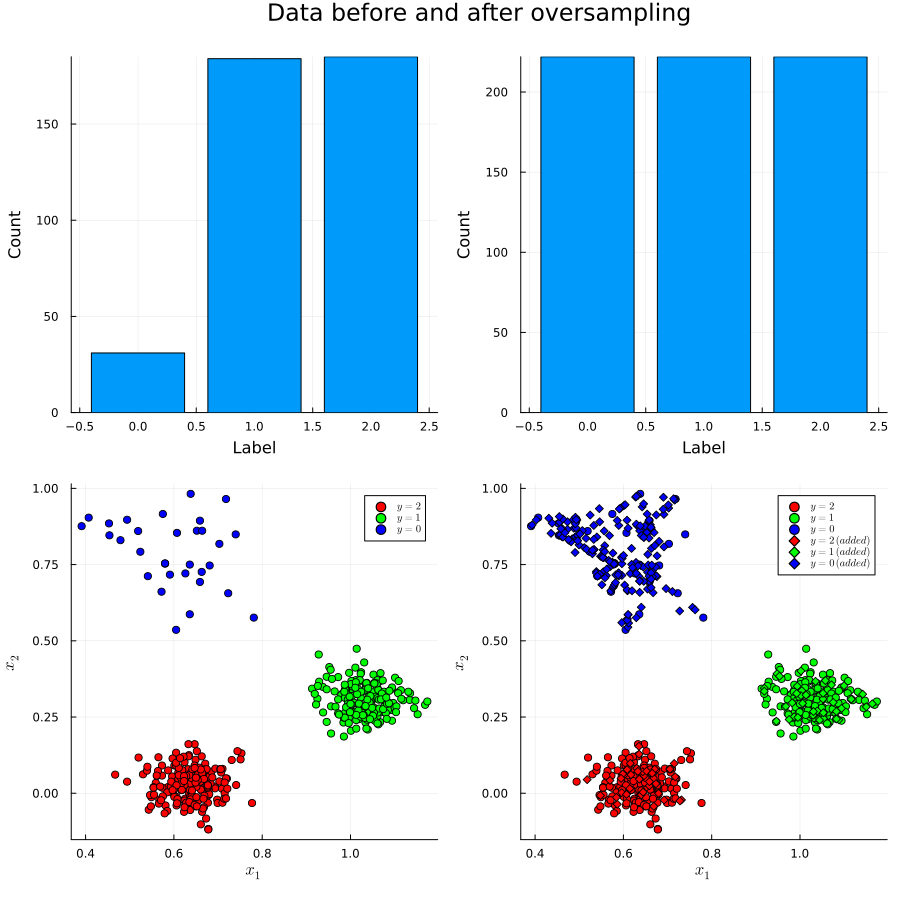

In [17]:
download("https://raw.githubusercontent.com/JuliaAI/Imbalance.jl/dev/examples/plot.jl", "./")
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)

Plots.AnimatedGif("/Users/essam/Documents/GitHub/Imbalance.jl/examples/assets/smote.gif")
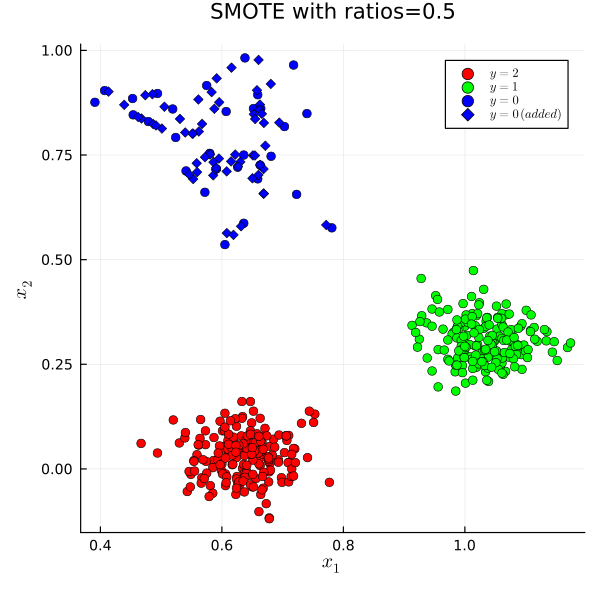

In [18]:
import Logging
Logging.disable_logging(Logging.Warn)

anim = @animate for ratios ∈ 0.5:0.01:1.2
	X_under, y_under = smote(X, y; ratios = ratios, rng = Random.Xoshiro(42))
	plot_data(y, y_under, X, X_under; single_plot=true, 
			  single_plot_title="SMOTE with ratios=$ratios")
end
gif(anim, (isdir("./assets")) ? "./assets/smote.gif" : "./smote.gif", fps=3)